# 自动化特征工程 - 分析并初选特征

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
此文档是根据IBM 实验室在自动化特征工程领域的研究"One button machine for automating feature engineering in relational databases"及相关文献的思路对开放数据集“Berka dataset”进行特征工程的初步实践。
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
此部分是分析特征数据，并计算相关性进行特征初选。
</p>

In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import os

In [3]:
spark = SparkSession \
    .builder \
    .appName("Feature Engineering Prepare example") \
    .config("spark.sql.execution.arrow.enabled", "false") \
    .getOrCreate()

## 1. 读入生成的特征宽表

In [4]:
path = os.environ['DSX_PROJECT_DIR']+'/datasets'

In [5]:
sch_loan_ex = StructType([
	StructField("account_id", IntegerType(), True),
	StructField("frequency", IntegerType(), True),
	StructField("acc_open_days", IntegerType(), True),
	StructField("gender", IntegerType(), True),
	StructField("birth_days", IntegerType(), True),
	StructField("client_cnt", IntegerType(), True),
	StructField("trans_cnt", IntegerType(), True),
	StructField("amt_s", DecimalType(11, 2), True),
	StructField("amt_a", DecimalType(11, 2), True),
	StructField("amt_d", DecimalType(11, 2), True),
	StructField("amt_x", DecimalType(11, 2), True),
	StructField("amt_n", DecimalType(11, 2), True),
	StructField("balance_s", DecimalType(11, 2), True),
	StructField("balance_a", DecimalType(11, 2), True),
	StructField("balance_d", DecimalType(11, 2), True),
	StructField("balance_x", DecimalType(11, 2), True),
	StructField("balance_n", DecimalType(11, 2), True),
	StructField("trans_dt_r", IntegerType(), True),
	StructField("symbol_1", IntegerType(), True),
	StructField("symbol_2", IntegerType(), True),
	StructField("symbol_3", IntegerType(), True),
	StructField("symbol_4", IntegerType(), True),
	StructField("symbol_5", IntegerType(), True),
	StructField("symbol_6", IntegerType(), True),
	StructField("symbol_amt_1_s", DecimalType(11, 2), True),
	StructField("symbol_amt_2_s", DecimalType(11, 2), True),
	StructField("symbol_amt_3_s", DecimalType(11, 2), True),
	StructField("symbol_amt_4_s", DecimalType(11, 2), True),
	StructField("symbol_amt_5_s", DecimalType(11, 2), True),
	StructField("symbol_amt_6_s", DecimalType(11, 2), True),
	StructField("symbol_amt_1_a", DecimalType(11, 2), True),
	StructField("symbol_amt_2_a", DecimalType(11, 2), True),
	StructField("symbol_amt_3_a", DecimalType(11, 2), True),
	StructField("symbol_amt_4_a", DecimalType(11, 2), True),
	StructField("symbol_amt_5_a", DecimalType(11, 2), True),
	StructField("symbol_amt_6_a", DecimalType(11, 2), True),
	StructField("symbol_amt_1_x", DecimalType(11, 2), True),
	StructField("symbol_amt_2_x", DecimalType(11, 2), True),
	StructField("symbol_amt_3_x", DecimalType(11, 2), True),
	StructField("symbol_amt_4_x", DecimalType(11, 2), True),
	StructField("symbol_amt_5_x", DecimalType(11, 2), True),
	StructField("symbol_amt_6_x", DecimalType(11, 2), True),
	StructField("symbol_amt_1_n", DecimalType(11, 2), True),
	StructField("symbol_amt_2_n", DecimalType(11, 2), True),
	StructField("symbol_amt_3_n", DecimalType(11, 2), True),
	StructField("symbol_amt_4_n", DecimalType(11, 2), True),
	StructField("symbol_amt_5_n", DecimalType(11, 2), True),
	StructField("symbol_amt_6_n", DecimalType(11, 2), True),
	StructField("card_cnt", IntegerType(), True),
	StructField("card_tp", IntegerType(), True),
	StructField("card_issued_days", IntegerType(), True),
	StructField("region_tp", IntegerType(), True),
	StructField("Inhabitants", IntegerType(), True),
	StructField("Municipalities499", IntegerType(), True),
	StructField("Municipalities1999", IntegerType(), True),
	StructField("Municipalities9999", IntegerType(), True),
	StructField("Municipalities10000", IntegerType(), True),
	StructField("cities", IntegerType(), True),
	StructField("urbanratio", DecimalType(11, 2), True),
	StructField("avgsalary", DecimalType(11, 2), True),
	StructField("unemploy95", DecimalType(11, 2), True),
	StructField("unemploy96", DecimalType(11, 2), True),
	StructField("Enterpreneurs", IntegerType(), True),
	StructField("crimes95", IntegerType(), True),
	StructField("crimes96", IntegerType(), True),
	StructField("payorder_cnt", IntegerType(), True),
	StructField("payorder_amt_s", DecimalType(11, 2), True),
	StructField("payorder_amt_a", DecimalType(11, 2), True),
	StructField("payorder_amt_t", DecimalType(11, 2), True),
	StructField("payorder_amt_x", DecimalType(11, 2), True),
	StructField("payorder_symbol_1", IntegerType(), True),
	StructField("payorder_symbol_2", IntegerType(), True),
	StructField("payorder_symbol_3", IntegerType(), True),
	StructField("payorder_symbol_4", IntegerType(), True),
	StructField("payorder_symbol_6", IntegerType(), True),
	StructField("granted_days", IntegerType(), True),
	StructField("amount", DecimalType(11, 2), True),
	StructField("duration", IntegerType(), True),
	StructField("payments", DecimalType(11, 2), True),
	StructField("label", IntegerType(), True)
    ])

In [6]:
df_loan = spark.read.csv(path+"/loan_ex2.csv", header=True, schema=sch_loan_ex)

In [7]:
df_loan.show(2)

+----------+---------+-------------+------+----------+----------+---------+----------+-------+-------+--------+-----+-----------+---------+---------+---------+---------+----------+--------+--------+--------+--------+--------+--------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------------+--------+-------+----------------+---------+-----------+-----------------+------------------+------------------+-------------------+------+----------+---------+----------+----------+-------------+--------+--------+------------+--------------+--------------+--------------+--------------+-----------------+-----------------+-----------------+-----------------+-----------------+------------+---------+------

In [8]:
cols =["frequency", "acc_open_days", "gender", "birth_days", "client_cnt", "trans_cnt", \
               "amt_s", "amt_a", "amt_d", "amt_x", "amt_n", "balance_s", "balance_a", "balance_d", \
               "balance_x", "balance_n", "trans_dt_r", "symbol_1", "symbol_2", "symbol_3", "symbol_4",  "symbol_5", \
               "symbol_6", "symbol_amt_1_s", "symbol_amt_2_s", "symbol_amt_3_s", "symbol_amt_4_s", \
               "symbol_amt_5_s", "symbol_amt_6_s", "symbol_amt_1_a", "symbol_amt_2_a", "symbol_amt_3_a", "symbol_amt_4_a", \
               "symbol_amt_5_a", "symbol_amt_6_a", "symbol_amt_1_x", "symbol_amt_2_x", "symbol_amt_3_x", "symbol_amt_4_x", \
               "symbol_amt_5_x", "symbol_amt_6_x", "symbol_amt_1_n", "symbol_amt_2_n", "symbol_amt_3_n", "symbol_amt_4_n", \
               "symbol_amt_5_n", "symbol_amt_6_n", "card_cnt", "card_tp", "card_issued_days", "region_tp", "Inhabitants", \
               "Municipalities499", "Municipalities1999", "Municipalities9999", "Municipalities10000", \
               "cities", "urbanratio", "avgsalary", "unemploy95", "unemploy96", "Enterpreneurs", "crimes95", \
               "crimes96", "payorder_cnt", "payorder_amt_s", "payorder_amt_a", "payorder_amt_t", \
               "payorder_amt_x", "payorder_symbol_1", "payorder_symbol_2", "payorder_symbol_3", \
               "payorder_symbol_4", "payorder_symbol_6", "granted_days", "amount", "duration", "payments", "label"]

## 2. 计算各个特征与目标变量的相关系数

In [9]:
size = len(cols) - 1

In [10]:
import pandas as pd
corr_ = []
for i in range(size):
    cor = df_loan.corr(cols[i], cols[-1])
    if pd.isnull(cor):
        cor = 0
    corr_.append((cols[i], cor))

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
对相关系数排序，无限接近0意味着该特征独立于目标变量。
</p>

In [11]:
corr_.sort(key=lambda x: x[1], reverse=True)
for j in range(size):
    print("Correlation between label and", corr_[j][0], "\t\t:\t", corr_[j][1])

Correlation between label and balance_d 		:	 0.22425958395728934
Correlation between label and symbol_amt_2_x 		:	 0.1943105682100092
Correlation between label and trans_dt_r 		:	 0.1888468702910863
Correlation between label and payments 		:	 0.18151666988244147
Correlation between label and symbol_6 		:	 0.16264715680487843
Correlation between label and amount 		:	 0.16253375836331424
Correlation between label and symbol_amt_4_x 		:	 0.15413587061867434
Correlation between label and amt_x 		:	 0.13617145155395532
Correlation between label and symbol_amt_2_s 		:	 0.13422643103403187
Correlation between label and symbol_2 		:	 0.12359039442469731
Correlation between label and granted_days 		:	 0.11829856004153268
Correlation between label and symbol_amt_2_a 		:	 0.11657938462016394
Correlation between label and balance_x 		:	 0.10293580120591521
Correlation between label and symbol_4 		:	 0.09921131971927136
Correlation between label and acc_open_days 		:	 0.09507947943499104
Correlatio

## 3. 可视化理解特征在目标变量下的分布

In [12]:
def pltHist(x_, y_):
    from matplotlib import pyplot as plt
    
    plt.figure(figsize = (10, 6))
    plt.hist(x_, bins=10, normed=True, alpha=0.5, label='not default')
    plt.hist(y_, bins=10, normed=True, alpha=0.5, label='default')
    plt.legend(loc='upper right')
    plt.show()

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
首先选择负向关联较高的特征balance_n，直方图显示在违约和不违约情况下有着很好的区分度。
</p>

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


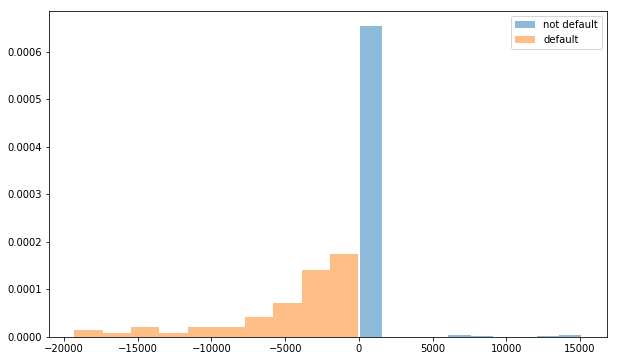

In [14]:
x = df_loan.filter(df_loan['label'] == '0').select('balance_n').rdd.map(lambda x: float(x[0])).collect()
y = df_loan.filter(df_loan['label'] == '1').select('balance_n').rdd.map(lambda x: float(x[0])).collect()
pltHist(x, y)

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
选择正向关联较高的特征payments，直方图显示在违约和不违约情况下区分度也较好。
</p>

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


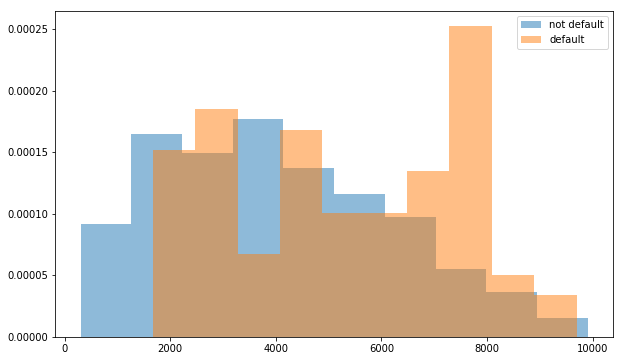

In [15]:
x = df_loan.filter(df_loan['label'] == '0').select('payments').rdd.map(lambda x: float(x[0])).collect()
y = df_loan.filter(df_loan['label'] == '1').select('payments').rdd.map(lambda x: float(x[0])).collect()
pltHist(x, y)

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


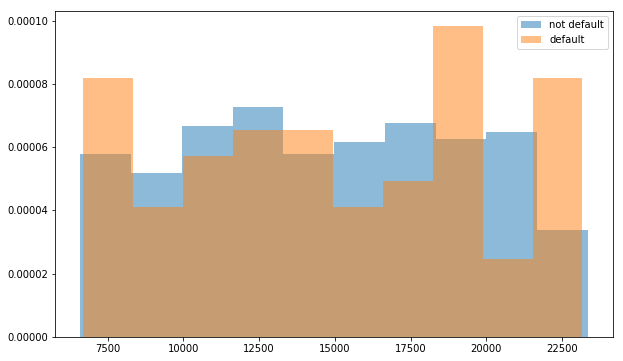

In [16]:
x = df_loan.filter(df_loan['label'] == '0').select('birth_days').rdd.map(lambda x: float(x[0])).collect()
y = df_loan.filter(df_loan['label'] == '1').select('birth_days').rdd.map(lambda x: float(x[0])).collect()
pltHist(x, y)

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
选择正向关联不高的特征trans_cnt，直方图显示在违约和不违约情况下区分度不明显。
</p>

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


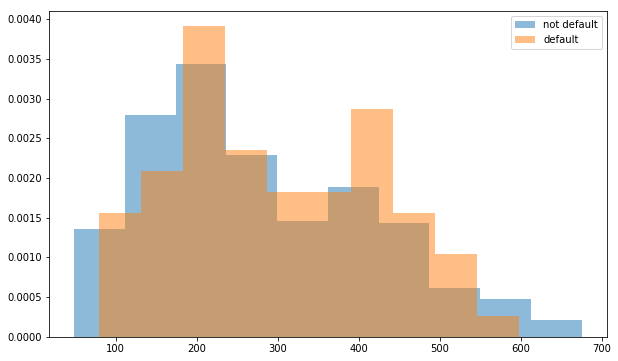

In [17]:
x = df_loan.filter(df_loan['label'] == '0').select('trans_cnt').rdd.map(lambda x: float(x[0])).collect()
y = df_loan.filter(df_loan['label'] == '1').select('trans_cnt').rdd.map(lambda x: float(x[0])).collect()
pltHist(x, y)

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
选择特征symbol_amt_4_x，是现金支取额最大的交易特征，直方图显示在违约和不违约情况下区分度。
</p>

/opt/conda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


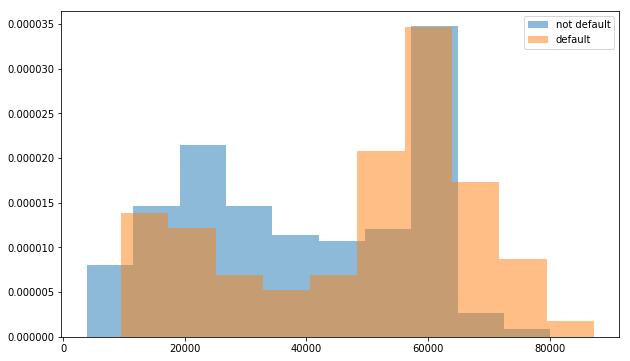

In [18]:
x = df_loan.filter(df_loan['label'] == '0').select('symbol_amt_4_x').rdd.map(lambda x: float(x[0])).collect()
y = df_loan.filter(df_loan['label'] == '1').select('symbol_amt_4_x').rdd.map(lambda x: float(x[0])).collect()
pltHist(x, y)

## 4. 计算特征间的相关系数并可视化展现

### 4.1 先做标准化处理

In [19]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler
# ["frequency", "acc_open_days", "gender", "birth_days", "client_cnt", "trans_cnt", "amt_s", "amt_a", "amt_d", "amt_x", "amt_n", "balance_s", "balance_a", "balance_d", "balance_x", "balance_n", "trans_dt_r", "symbol_1", "symbol_2", "symbol_3", "symbol_4", "symbol_6", "symbol_amt_1_s", "symbol_amt_2_s", "symbol_amt_3_s", "symbol_amt_4_s", "symbol_amt_6_s", "symbol_amt_1_x", "symbol_amt_2_x", "symbol_amt_3_x", "symbol_amt_4_x", "symbol_amt_6_x", "symbol_amt_1_n", "symbol_amt_2_n", "symbol_amt_3_n", "symbol_amt_4_n", "symbol_amt_6_n", "card_cnt", "card_tp", "card_issued_days", "region_tp", "Inhabitants", "Municipalities499", "Municipalities1999", "Municipalities9999", "Municipalities10000", "cities", "urbanratio", "avgsalary", "unemploy95", "unemploy96", "Enterpreneurs", "crimes95", "crimes96", "payorder_cnt", "payorder_amt_s", "payorder_amt_a", "payorder_amt_t", "payorder_amt_x", "payorder_symbol_1", "payorder_symbol_2", "payorder_symbol_3", "payorder_symbol_4", "payorder_symbol_6", "granted_days", "amount", "duration", "payments"]
assembler = VectorAssembler(
    inputCols=cols,
    outputCol="features")

output = assembler.transform(df_loan)

In [20]:
from pyspark.ml.stat import Correlation
from pyspark.ml.feature import StandardScaler, StandardScalerModel

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures", 
                        withStd=True, withMean=True)

# Compute summary statistics by fitting the StandardScaler
scalerModel = scaler.fit(output)

# Normalize each feature to have unit standard deviation.
scaledData = scalerModel.transform(output)
#r1 = Correlation.corr(scaledData, "features").head()

In [21]:
scaledData.toPandas()['scaledFeatures'][0]

DenseVector([-0.4364, -1.4141, 0.9845, -0.4917, 1.9171, -1.39, -1.1275, -0.3572, -0.4384, 0.1066, -0.0451, -1.1978, -0.5099, -0.9537, -0.898, 0.2967, -0.1256, -0.3438, -0.6701, -0.5833, -1.347, -0.7649, -1.127, -0.344, -0.5788, -0.5357, -1.0495, -0.5798, -1.0997, -0.3646, 0.3666, -0.5955, -0.6675, 0.9673, -0.0588, -0.4872, -0.027, -0.5999, 0.3059, 1.3233, -1.0512, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -0.5712, -0.5518, -0.4029, -0.6503, -0.4974, 1.394, 0.2109, -0.1421, 0.2503, 0.5448, -0.4617, -0.8547, -0.2566, -0.2574, -1.4545, -0.4877, -0.4739, -0.191, 0.5564, 0.6588, 2.0868, 1.3233, -0.4509, 0.7287, 0.0, 0.0, -0.6732, -0.9899, -1.1285, -1.4341, -1.0058, -0.3509])

### 4.2 计算相关系数矩阵

In [22]:
r1 = Correlation.corr(scaledData, "scaledFeatures").head()

In [23]:
print("Pearson correlation matrix:\n" + str(r1[0]))

Pearson correlation matrix:
DenseMatrix([[ 1.        ,  0.04618044, -0.0064804 , ..., -0.00422248,
               0.08363435,  0.03962549],
             [ 0.04618044,  1.        , -0.00864184, ..., -0.07488156,
               0.00770911,  0.09507948],
             [-0.0064804 , -0.00864184,  1.        , ..., -0.00354974,
               0.02789018,  0.02326679],
             ...,
             [-0.00422248, -0.07488156, -0.00354974, ...,  1.        ,
              -0.04275234,  0.02015041],
             [ 0.08363435,  0.00770911,  0.02789018, ..., -0.04275234,
               1.        ,  0.18151667],
             [ 0.03962549,  0.09507948,  0.02326679, ...,  0.02015041,
               0.18151667,  1.        ]])


In [24]:
import pandas as pd
df = pd.DataFrame(r1[0].values.reshape(r1[0].numRows, r1[0].numCols))

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
删除掉相关系数矩阵中有null变量的相应行和列。
</p>

In [25]:
def dropna_matrix(df_m, cols_):
    sz = df_m.shape[0]
    for i in range(sz):
        for j in range(sz):
            if pd.isnull(df[i][j]):
                df_nona = df_m.drop([j])
                df_nona.drop([j], axis=1, inplace=True)
                df_nona = df_nona.reset_index(drop=True)
                df_nona = df_nona.T.reset_index(drop=True).T
                cols_.remove(cols_[j])
                return (True, df_nona)
    return (False, df_m)

In [26]:
cols_ = cols.copy()
flag, df_nona = dropna_matrix(df, cols_)

In [27]:
while flag:
    flag, df_nona = dropna_matrix(df_nona, cols_)
    
df_nona

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,1.000000,0.046180,-0.006480,0.026018,-0.003328,0.033035,0.183660,0.195777,0.214813,0.243828,...,0.064590,0.180981,0.043802,0.075510,0.000722,0.125110,0.073953,0.237143,0.098477,0.210180
1,0.046180,1.000000,-0.008642,-0.044310,0.035157,0.932011,0.675567,-0.059303,-0.029673,0.090302,...,-0.063772,-0.026002,-0.023557,-0.044184,0.043443,0.084565,-0.037375,0.139476,-0.064265,0.173722
2,-0.006480,-0.008642,1.000000,-0.090953,0.013987,-0.016821,-0.033278,-0.025234,-0.019875,-0.041478,...,0.005045,-0.014395,-0.030858,0.019409,-0.032289,-0.029258,0.009364,-0.059639,-0.008323,-0.051240
3,0.026018,-0.044310,-0.090953,1.000000,0.035689,-0.034984,-0.056542,-0.020098,-0.024032,-0.034551,...,-0.000205,-0.037958,0.060290,-0.041940,-0.040888,0.003977,-0.004219,-0.041294,0.079902,-0.006573
4,-0.003328,0.035157,0.013987,0.035689,1.000000,0.034094,0.003688,-0.037894,-0.065266,-0.071806,...,0.021315,-0.078439,0.141095,0.004010,0.013886,-0.082762,0.026548,-0.065673,0.130689,-0.001203
5,0.033035,0.932011,-0.016821,-0.034984,0.034094,1.000000,0.688007,-0.092821,-0.031407,0.104139,...,-0.080058,-0.078613,0.044042,-0.092271,0.055849,0.088623,-0.031272,0.146758,-0.028455,0.188608
6,0.183660,0.675567,-0.033278,-0.056542,0.003688,0.688007,1.000000,0.579946,0.606904,0.647731,...,0.190094,0.568118,0.052446,0.279421,0.182992,0.277762,0.221412,0.637800,0.165300,0.635873
7,0.195777,-0.059303,-0.025234,-0.020098,-0.037894,-0.092821,0.579946,1.000000,0.961881,0.847032,...,0.423156,0.954175,0.053420,0.527464,0.231396,0.277281,0.398539,0.772509,0.298340,0.712074
8,0.214813,-0.029673,-0.019875,-0.024032,-0.065266,-0.031407,0.606904,0.961881,1.000000,0.925672,...,0.409793,0.931098,0.013141,0.542802,0.232536,0.328300,0.405673,0.845029,0.238332,0.762323
9,0.243828,0.090302,-0.041478,-0.034551,-0.071806,0.104139,0.647731,0.847032,0.925672,1.000000,...,0.246422,0.827362,0.002119,0.502571,0.211662,0.470233,0.254466,0.957523,0.204018,0.812220


### 4.3 图形展现特征间相关性

In [28]:
from matplotlib import pyplot as plt
from matplotlib import cm as cm

def correlation_matrix(df_, cols_):
    fig = plt.figure(figsize=(14, 10))
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 60)
    cax = ax1.imshow(df_, interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Feature Correlation')
    labels=cols_
#    ax1.set_xticklabels(labels,fontsize=10, rotation=90)
#    ax1.set_yticklabels(labels,fontsize=10, rotation=360)
    plt.xticks(range(len(cols_)), labels,fontsize=10, rotation=90)
    plt.yticks(range(len(cols_)), labels,fontsize=10, rotation=360)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[-1, -0.8, -0.6, -0.4, -0.2, 0, .2,.4,.6,.8,1])
    plt.show()


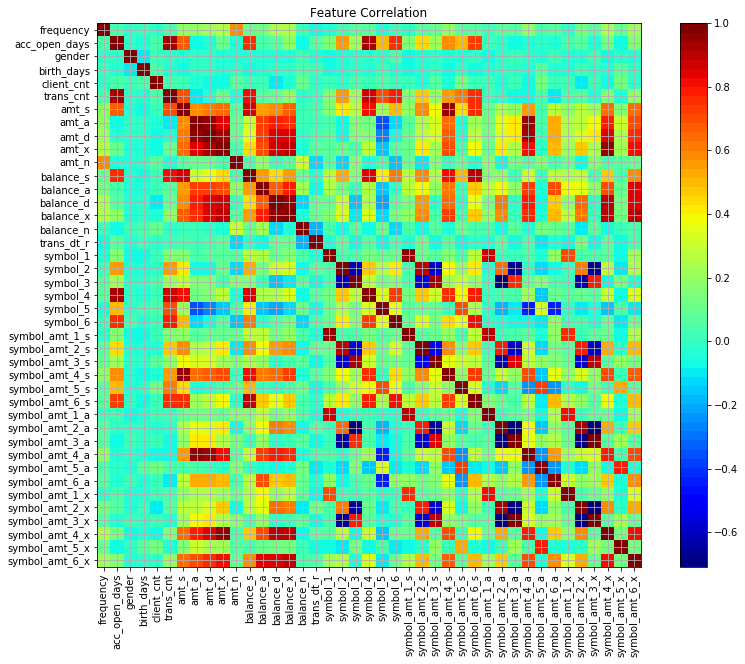

In [29]:
correlation_matrix(df_nona, cols_)

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
实际项目中会根据相关系数矩阵找到相关性非常高的特征，适当删除。
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
此略。
</p>

In [30]:
spark.stop()

## 作者

**李英伟 liyingw@cn.ibm.com ** 